In [84]:
# Data Processing
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
# Scaling
from sklearn.preprocessing import MinMaxScaler
# Statistical Analysis
from scipy import stats
# Modeling
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [8]:
df = pd.read_csv("Dataset.csv")
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

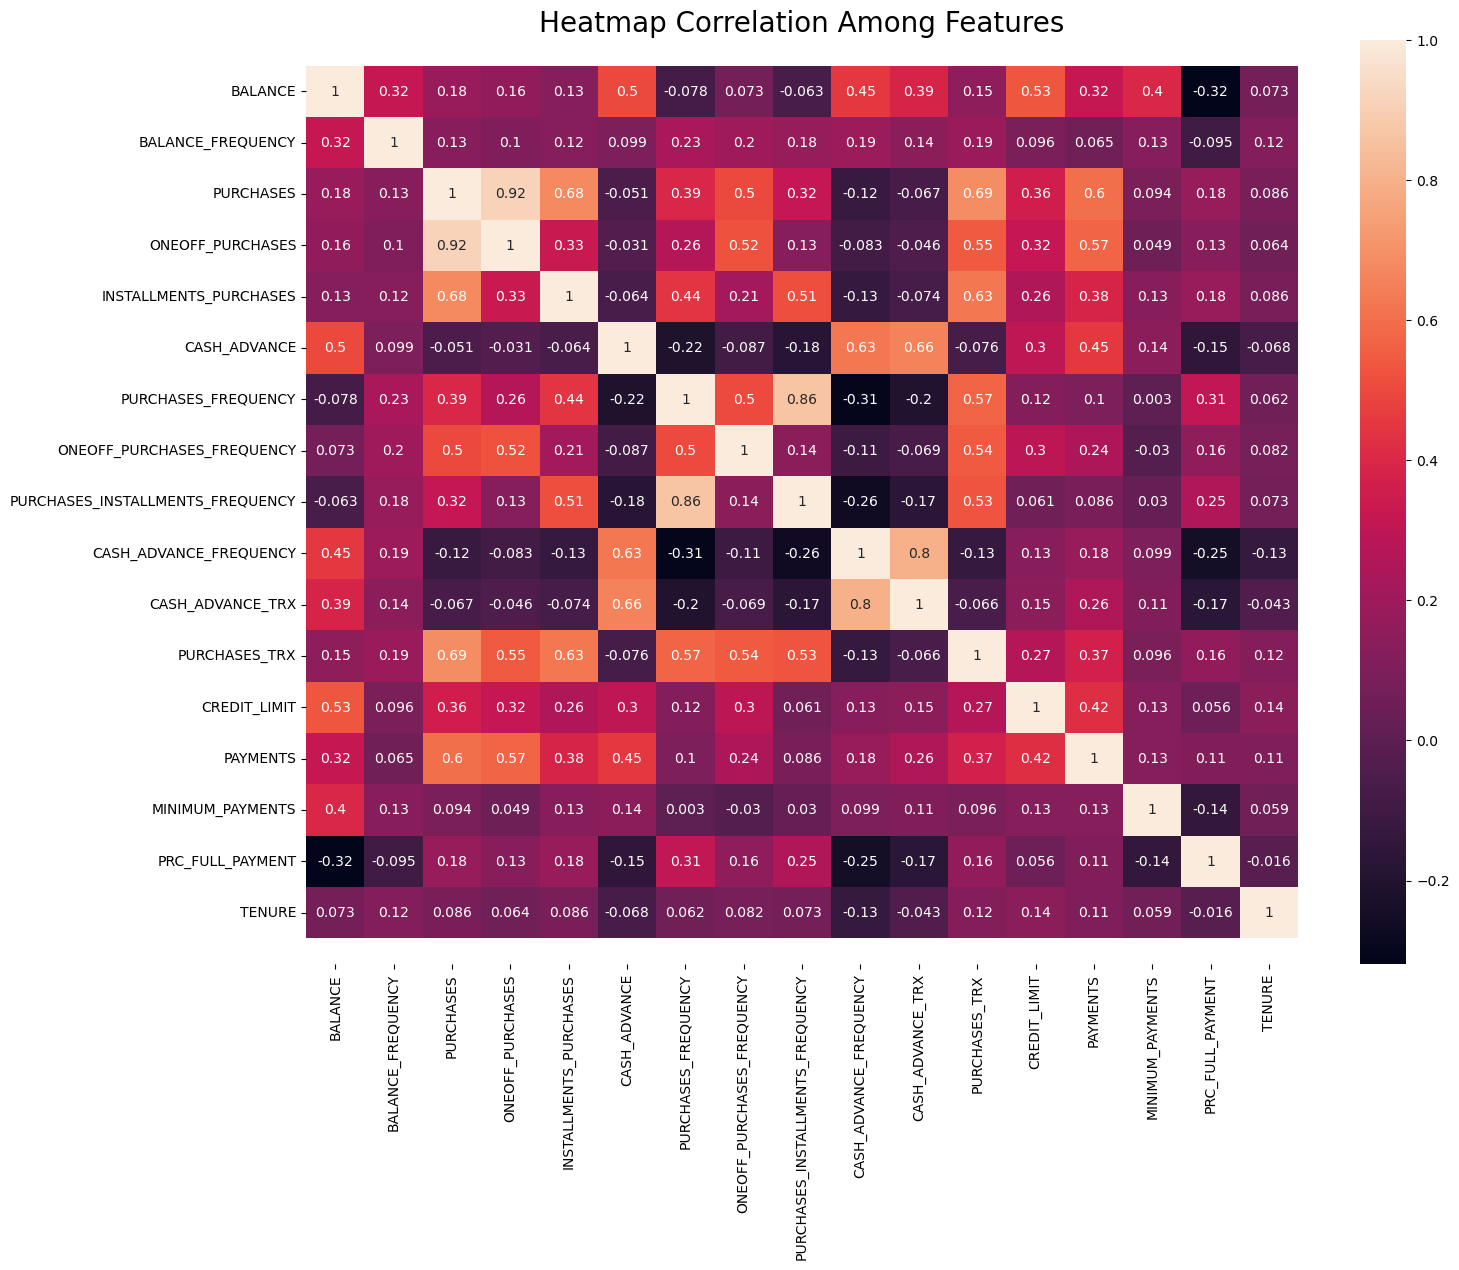

In [11]:
feature = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

plt.figure(figsize=(16,12))
ax = sns.heatmap(df[feature].corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap Correlation Among Features', size=20)
plt.show()

In [13]:
def outlier_percentage(data):
    '''
    This function calculates the percentage of outlier in a dataset.
    '''
    quantile_1 = data.quantile(0.25)
    quantile_3 = data.quantile(0.75)
    IQR = quantile_3 - quantile_1
    lower_treshold = quantile_1 - (1.5 * IQR)
    upper_threshold = quantile_3 + (1.5 * IQR)
    num_outliers =  np.sum((data < lower_treshold) |(data > upper_threshold))
    outliers =  ((data < lower_treshold) |(data > upper_threshold))
    num_data = data.count()
    return (num_outliers/num_data)*100

In [21]:
def show_outlier(data):
    '''
    This function shows the percentage of outlier in each numerical column.
    '''
    for column in data.columns:
        data_section = data[column]
        percent = str(round(outlier_percentage(data_section), 2))
        print(f'Outlier in column "{column}": {percent}%')
non_categorical_data = df.drop(['CUST_ID'], axis=1)
show_outlier(non_categorical_data)

Outlier in column "BALANCE": 7.77%
Outlier in column "BALANCE_FREQUENCY": 16.68%
Outlier in column "PURCHASES": 9.03%
Outlier in column "ONEOFF_PURCHASES": 11.32%
Outlier in column "INSTALLMENTS_PURCHASES": 9.69%
Outlier in column "CASH_ADVANCE": 11.51%
Outlier in column "PURCHASES_FREQUENCY": 0.0%
Outlier in column "ONEOFF_PURCHASES_FREQUENCY": 8.74%
Outlier in column "PURCHASES_INSTALLMENTS_FREQUENCY": 0.0%
Outlier in column "CASH_ADVANCE_FREQUENCY": 5.87%
Outlier in column "CASH_ADVANCE_TRX": 8.98%
Outlier in column "PURCHASES_TRX": 8.56%
Outlier in column "CREDIT_LIMIT": 2.77%
Outlier in column "PAYMENTS": 9.03%
Outlier in column "MINIMUM_PAYMENTS": 9.74%
Outlier in column "PRC_FULL_PAYMENT": 16.47%
Outlier in column "TENURE": 15.26%


In [23]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [25]:
missing_credit_limit_indeks = df[df['CREDIT_LIMIT'].isna()].index[0]
df.loc[missing_credit_limit_indeks,"CREDIT_LIMIT"] = df.loc[missing_credit_limit_indeks,"CASH_ADVANCE"]/0.3 

In [27]:
df_missing_minimum_payments = df[df['MINIMUM_PAYMENTS'].isna()]
for i in df_missing_minimum_payments.index:
  if df_missing_minimum_payments.loc[i,'PAYMENTS']==0:
    df.loc[i,'MINIMUM_PAYMENTS'] = 0
  elif df_missing_minimum_payments.loc[i,"INSTALLMENTS_PURCHASES"] != 0:
    df.loc[i,'MINIMUM_PAYMENTS'] = df.loc[i,"INSTALLMENTS_PURCHASES"]
  elif df_missing_minimum_payments.loc[i,"CASH_ADVANCE"] != 0:
    df.loc[i,'MINIMUM_PAYMENTS'] = df.loc[i,"CASH_ADVANCE"]
  else :
    df.loc[i,'MINIMUM_PAYMENTS'] = df.loc[i,"PURCHASES"]*0.1

In [29]:
df_imputed_numerical = df.drop(['CUST_ID'], axis=1)
df_scaled_minmax = pd.DataFrame(MinMaxScaler().fit_transform(df_imputed_numerical), columns=df_imputed_numerical.columns)

In [32]:
z_minmax = np.abs(stats.zscore(df_scaled_minmax))

In [34]:
df_scaled_minmax_out = df_scaled_minmax[(z_minmax < 3).all(axis=1)]
df_scaled_minmax_out.shape

(7434, 17)

In [36]:
df_ready = df_scaled_minmax_out.drop(['PURCHASES'], axis=1)
df_ready.head()

BALANCE  BALANCE_FREQUENCY  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0  0.002148           0.818182          0.000000                 0.00424   
1  0.168169           0.909091          0.000000                 0.00000   
2  0.131026           1.000000          0.018968                 0.00000   
3  0.087521           0.636364          0.036775                 0.00000   
4  0.042940           1.000000          0.000393                 0.00000   

   CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0      0.000000             0.166667                    0.000000   
1      0.136685             0.000000                    0.000000   
2      0.000000             1.000000                    1.000000   
3      0.004366             0.083333                    0.083333   
4      0.000000             0.083333                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.083333                0.000000           0.00000   
1                          0.000000                0.166667           0.03252   
2                          0.000000                0.000000           0.00000   
3                          0.000000                0.055555           0.00813   
4                          0.000000                0.000000           0.00000   

   PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
0       0.005587      0.031720  0.003979          0.001826          0.000000   
1       0.000000      0.232053  0.080893          0.014035          0.222222   
2       0.033520      0.248748  0.012264          0.008210          0.000000   
3       0.002793      0.248748  0.000000          0.000000          0.000000   
4       0.002793      0.038397  0.013374          0.003204          0.000000   

   TENURE  
0     1.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0

In [38]:
pca = PCA(random_state=42).fit(df_ready)
pca_data = pca.transform(df_ready) 
pca_labels = ['PC' + str(component) for component in range(1,len(pca.components_)+1)]
pca_df = pd.DataFrame(pca_data, columns=pca_labels)
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.471841 -0.108847 -0.032890  0.062395 -0.050929 -0.154676 -0.004082   
1    -0.602686 -0.062429  0.121589 -0.178194 -0.058984  0.160210 -0.041031   
2     0.276748  0.965178 -0.136885  0.125879 -0.010332 -0.078846 -0.082238   
3    -0.583466 -0.014032  0.042740  0.198518 -0.089783  0.076487 -0.102322   
4    -0.551853  0.016973 -0.082304 -0.103228 -0.042162 -0.165297 -0.025543   
...        ...       ...       ...       ...       ...       ...       ...   
7429 -0.213480  0.381692  0.010287  0.267604  0.633814 -0.098311  0.003840   
7430  0.446075 -0.310687 -0.198017  0.173633  0.625717 -0.108245 -0.090701   
7431 -0.665190 -0.119852  0.029386  0.129497  0.596798 -0.026827 -0.068246   
7432  0.289287 -0.255032 -0.214256  0.043022  0.630833 -0.135935 -0.109803   
7433 -0.558431  0.003922  0.018669  0.153211  0.619861 -0.011744  0.023772   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0     0.012503 -0.005921  0.004293  0.006912  0.006329  0.002181  0.000313   
1    -0.001473  0.028064  0.050427 -0.053487  0.052009 -0.000475 -0.051682   
2    -0.220464  0.020959 -0.033516 -0.010762 -0.001395  0.016443 -0.001293   
3    -0.003332 -0.017961 -0.023328  0.017653 -0.010013 -0.013416  0.007434   
4     0.061102  0.015477  0.003814 -0.002978  0.002744  0.002476  0.001165   
...        ...       ...       ...       ...       ...       ...       ...   
7429 -0.025304 -0.004582 -0.006428  0.005401 -0.001146  0.010248  0.007776   
7430 -0.042222 -0.009184 -0.001387 -0.010454 -0.002876 -0.009389  0.004957   
7431  0.099688  0.014197  0.002145  0.004977  0.009910  0.002604  0.003656   
7432 -0.018401 -0.013996  0.007665 -0.004576 -0.002333  0.003920  0.006597   
7433  0.053231 -0.023258 -0.005975  0.011877 -0.003256  0.004812  0.022003   

          PC15      PC16  
0     0.001118 -0.001540  
1     0.012762  0.004273  
2    -0.011058 -0.003686  
3     0.027782 -0.004188  
4    -0.003735 -0.003844  
...        ...       ...  
7429 -0.009480 -0.001662  
7430 -0.004042 -0.002123  
7431 -0.002065 -0.000586  
7432 -0.000896 -0.002907  
7433 -0.008620 -0.001819  

[7434 rows x 16 columns]

In [40]:
explained_var_ratio_per_PCA = np.round(pca.explained_variance_ratio_ * 100, decimals=1) 
explained_var_ratio_per_PCA_df = pd.DataFrame(pca.explained_variance_ratio_ * 100, index= pca_labels)
explained_var_ratio_per_PCA_df.head()

0
PC1  54.590025
PC2  15.689914
PC3  14.385208
PC4   6.582920
PC5   3.099908

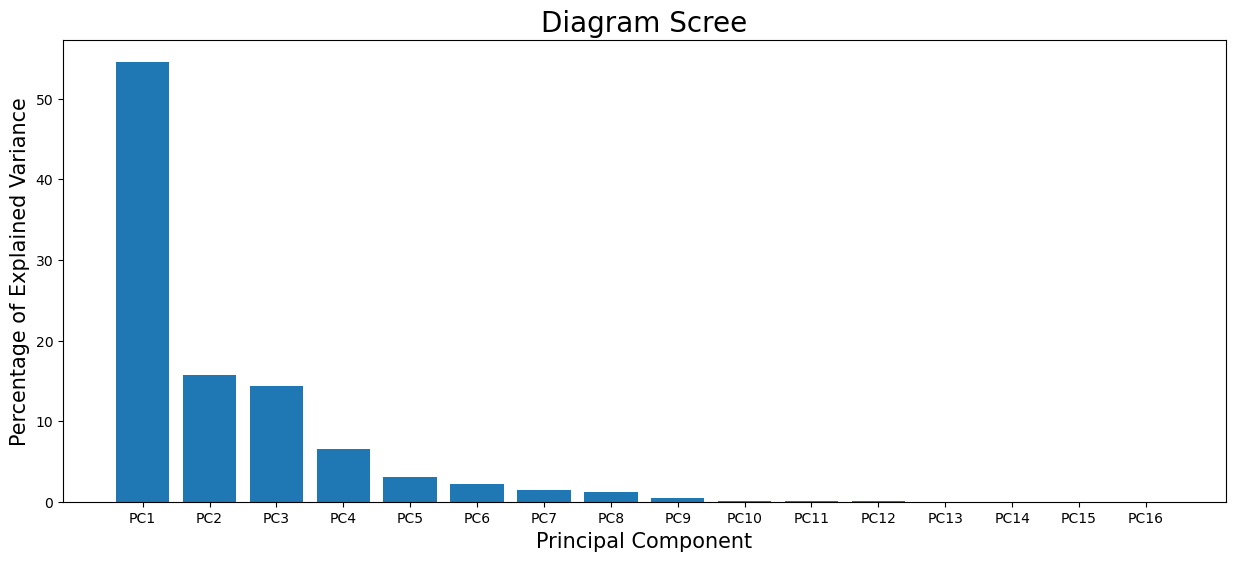

In [42]:
fig = plt.figure(figsize=(15,6))
plt.bar(x=range(1, len(explained_var_ratio_per_PCA)+1), height=explained_var_ratio_per_PCA, tick_label=pca_labels)
plt.ylabel('Percentage of Explained Variance', fontsize=15)
plt.xlabel('Principal Component', fontsize=15)
plt.title('Diagram Scree', fontsize=20)
plt.show()

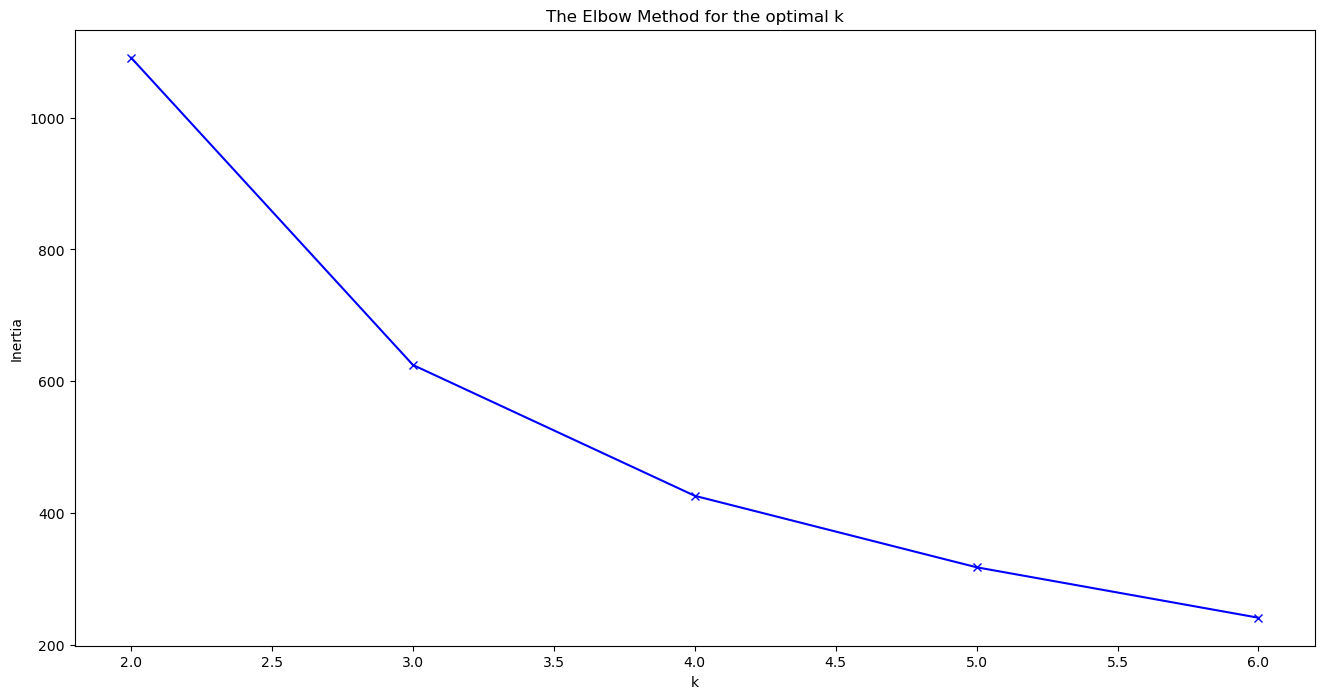

In [44]:
pca_clusters = pd.DataFrame(pca_df[['PC1','PC2']])

inertia = []
K = np.arange(2,7)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=8)
    kmeanModel.fit(pca_clusters)
    inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method for the optimal k')
plt.show()

In [46]:
silhouette_scores = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pca_clusters)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(pca_clusters, labels, metric = 'euclidean'))

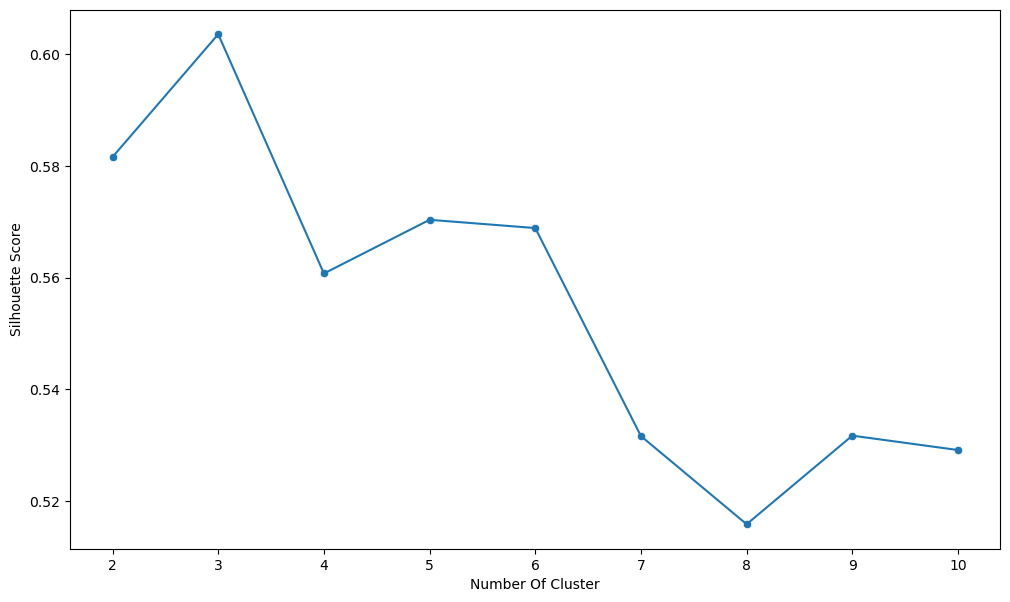

In [54]:
plt.figure(figsize=(12, 7))
sns.lineplot(x=number_of_cluster, y=silhouette_scores)
sns.scatterplot(x=number_of_cluster, y=silhouette_scores)
plt.xticks(number_of_cluster)
plt.xlabel('Number Of Cluster')
plt.ylabel('Silhouette Score')
plt.show()

In [56]:
k_means_clusters = KMeans(n_clusters=3,random_state=8).fit(pca_clusters)
cluster_center = k_means_clusters.cluster_centers_
cluster_preds = k_means_clusters.predict(pca_clusters)

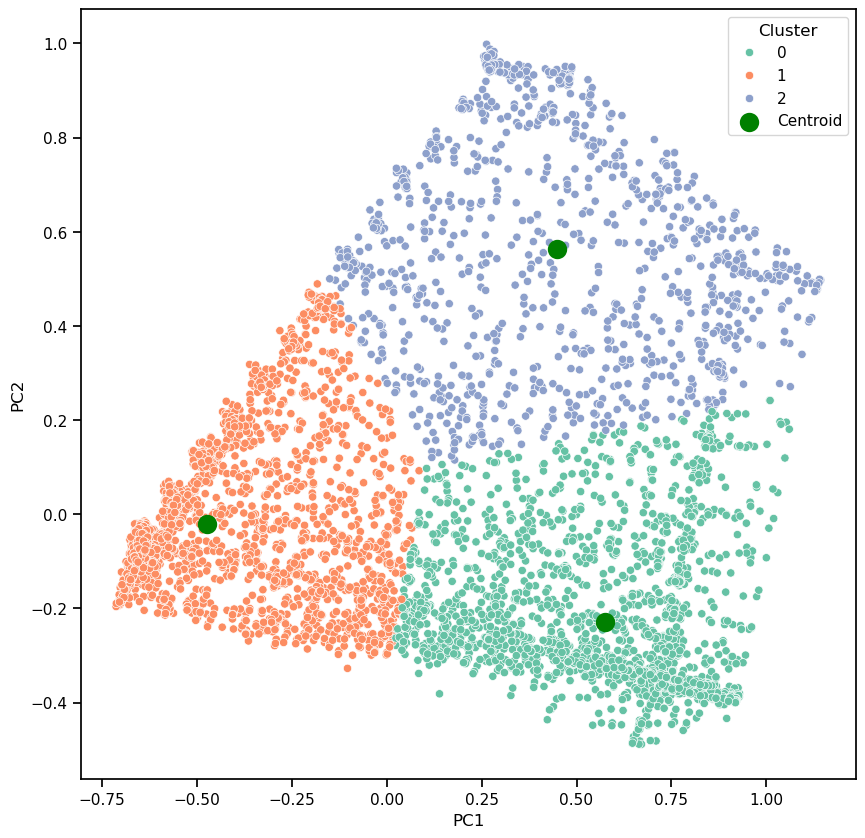

In [58]:
pca_clusters['cluster'] = cluster_preds

plt.figure(figsize=(10,10))
sns.set_context(context = 'notebook', font_scale=1)

sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'cluster', data = pca_clusters, palette='Set2')
plt.scatter(cluster_center[:,0],cluster_center[:,1], marker = "o", s=80, linewidths = 5, zorder = 10, c='green',label="Centroid")

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title="Cluster")
plt.show()

In [60]:
df_copy = df_ready.copy()
df_copy['cluster'] = cluster_preds
df_copy['cluster'].value_counts()

cluster
1    3940
0    2383
2    1111
Name: count, dtype: int64

In [62]:
cluster_0 = df_copy[df_copy['cluster']==0].drop('cluster', axis=1).mean()
cluster_1 = df_copy[df_copy['cluster']==1].drop('cluster', axis=1).mean()
cluster_2 = df_copy[df_copy['cluster']==2].drop('cluster', axis=1).mean()

In [64]:
cluster_0.sort_values(ascending=False)

TENURE                              0.961253
BALANCE_FREQUENCY                   0.926434
PURCHASES_FREQUENCY                 0.868383
PURCHASES_INSTALLMENTS_FREQUENCY    0.821606
PRC_FULL_PAYMENT                    0.254525
CREDIT_LIMIT                        0.123629
ONEOFF_PURCHASES_FREQUENCY          0.101332
PURCHASES_TRX                       0.054121
BALANCE                             0.048115
CASH_ADVANCE_FREQUENCY              0.035692
INSTALLMENTS_PURCHASES              0.031217
PAYMENTS                            0.023823
CASH_ADVANCE_TRX                    0.009444
MINIMUM_PAYMENTS                    0.007349
CASH_ADVANCE                        0.006826
ONEOFF_PURCHASES                    0.006507
dtype: float64

In [66]:
cluster_1.sort_values(ascending=False)

TENURE                              0.952453
BALANCE_FREQUENCY                   0.844099
PURCHASES_FREQUENCY                 0.146258
CREDIT_LIMIT                        0.122309
CASH_ADVANCE_FREQUENCY              0.103367
ONEOFF_PURCHASES_FREQUENCY          0.080783
BALANCE                             0.076195
PRC_FULL_PAYMENT                    0.067776
PURCHASES_INSTALLMENTS_FREQUENCY    0.064084
CASH_ADVANCE_TRX                    0.026454
PAYMENTS                            0.022869
CASH_ADVANCE                        0.020327
MINIMUM_PAYMENTS                    0.007678
PURCHASES_TRX                       0.007541
ONEOFF_PURCHASES                    0.005283
INSTALLMENTS_PURCHASES              0.002639
dtype: float64

In [68]:
cluster_2.sort_values(ascending=False)

TENURE                              0.973747
BALANCE_FREQUENCY                   0.972266
PURCHASES_FREQUENCY                 0.868965
ONEOFF_PURCHASES_FREQUENCY          0.783193
PURCHASES_INSTALLMENTS_FREQUENCY    0.402558
PRC_FULL_PAYMENT                    0.247975
CREDIT_LIMIT                        0.183472
PURCHASES_TRX                       0.082542
BALANCE                             0.072769
CASH_ADVANCE_FREQUENCY              0.046124
PAYMENTS                            0.038975
ONEOFF_PURCHASES                    0.038105
INSTALLMENTS_PURCHASES              0.019476
CASH_ADVANCE_TRX                    0.011840
CASH_ADVANCE                        0.008658
MINIMUM_PAYMENTS                    0.007097
dtype: float64

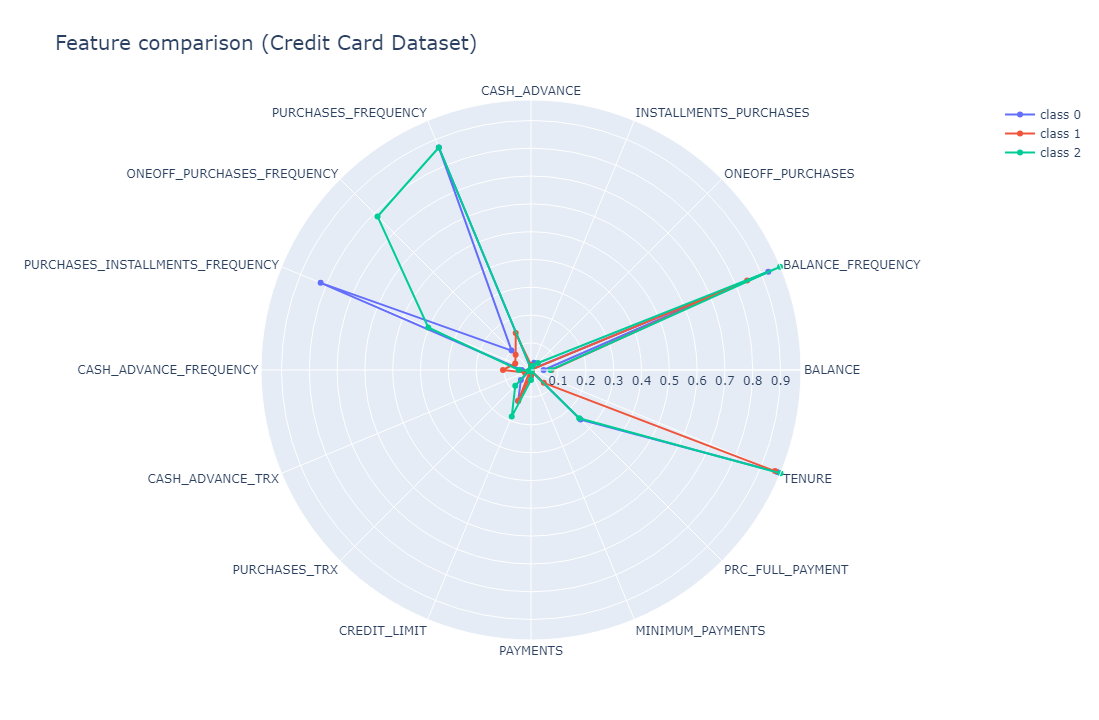

In [72]:
def make_radar_chart(dataset, title):

    mean_feature_per_cluster = dataset.groupby("cluster").mean().to_numpy()
    name_feature = dataset.columns[0:-1]
    categories = np.arange(0, len(mean_feature_per_cluster))
    
    fig = go.Figure()

    for i in range(len(mean_feature_per_cluster)):
      fig.add_trace(go.Scatterpolar(
          r=mean_feature_per_cluster[i],
          theta=name_feature,
          name=f'class {categories[i]}'
      ))

    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[np.min(mean_feature_per_cluster), np.max(mean_feature_per_cluster)]
        )),
      showlegend=True,
      width = 1200,
      height = 720,
      title = dict(text = f'Feature comparison ({title})\n',
                   font=dict(size=20))
    )

    fig.show()

make_radar_chart(df_copy, 'Credit Card Dataset')

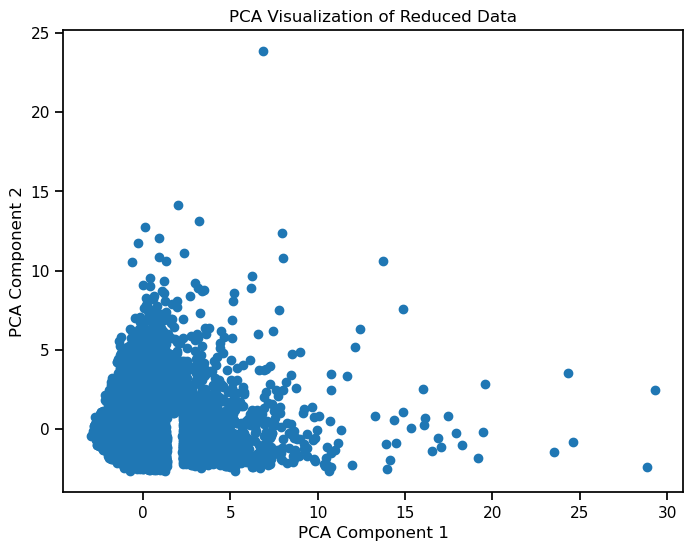

Silhouette Score: 0.5107693308981512


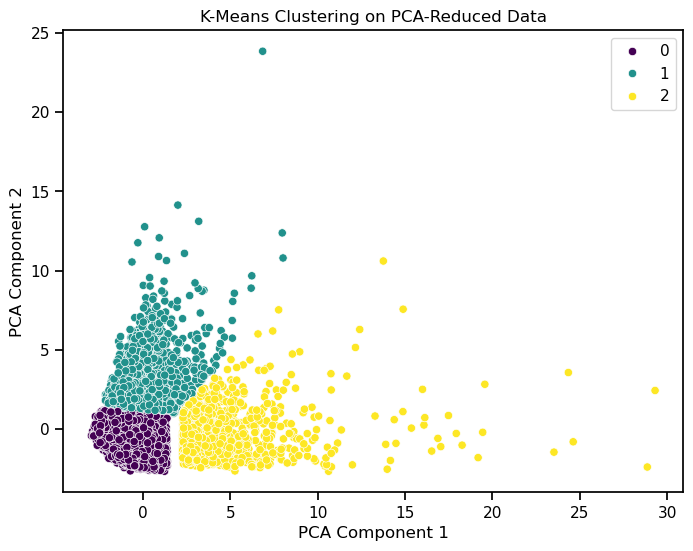

In [91]:
# Handle missing values
df = df.dropna()

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Scale only the numeric data
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(df[numeric_cols])

# Create a DataFrame for the scaled numeric data
scaled_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

# Visualize PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title('PCA Visualization of Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Apply Clustering Algorithm (K-Means Example)
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(pca_data)

# Add cluster labels to the original dataset
df['Cluster'] = clusters

# Evaluate the clustering using Silhouette Score
score = silhouette_score(pca_data, clusters)
print(f'Silhouette Score: {score}')

# Visualize Clusters in PCA Space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='viridis')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()